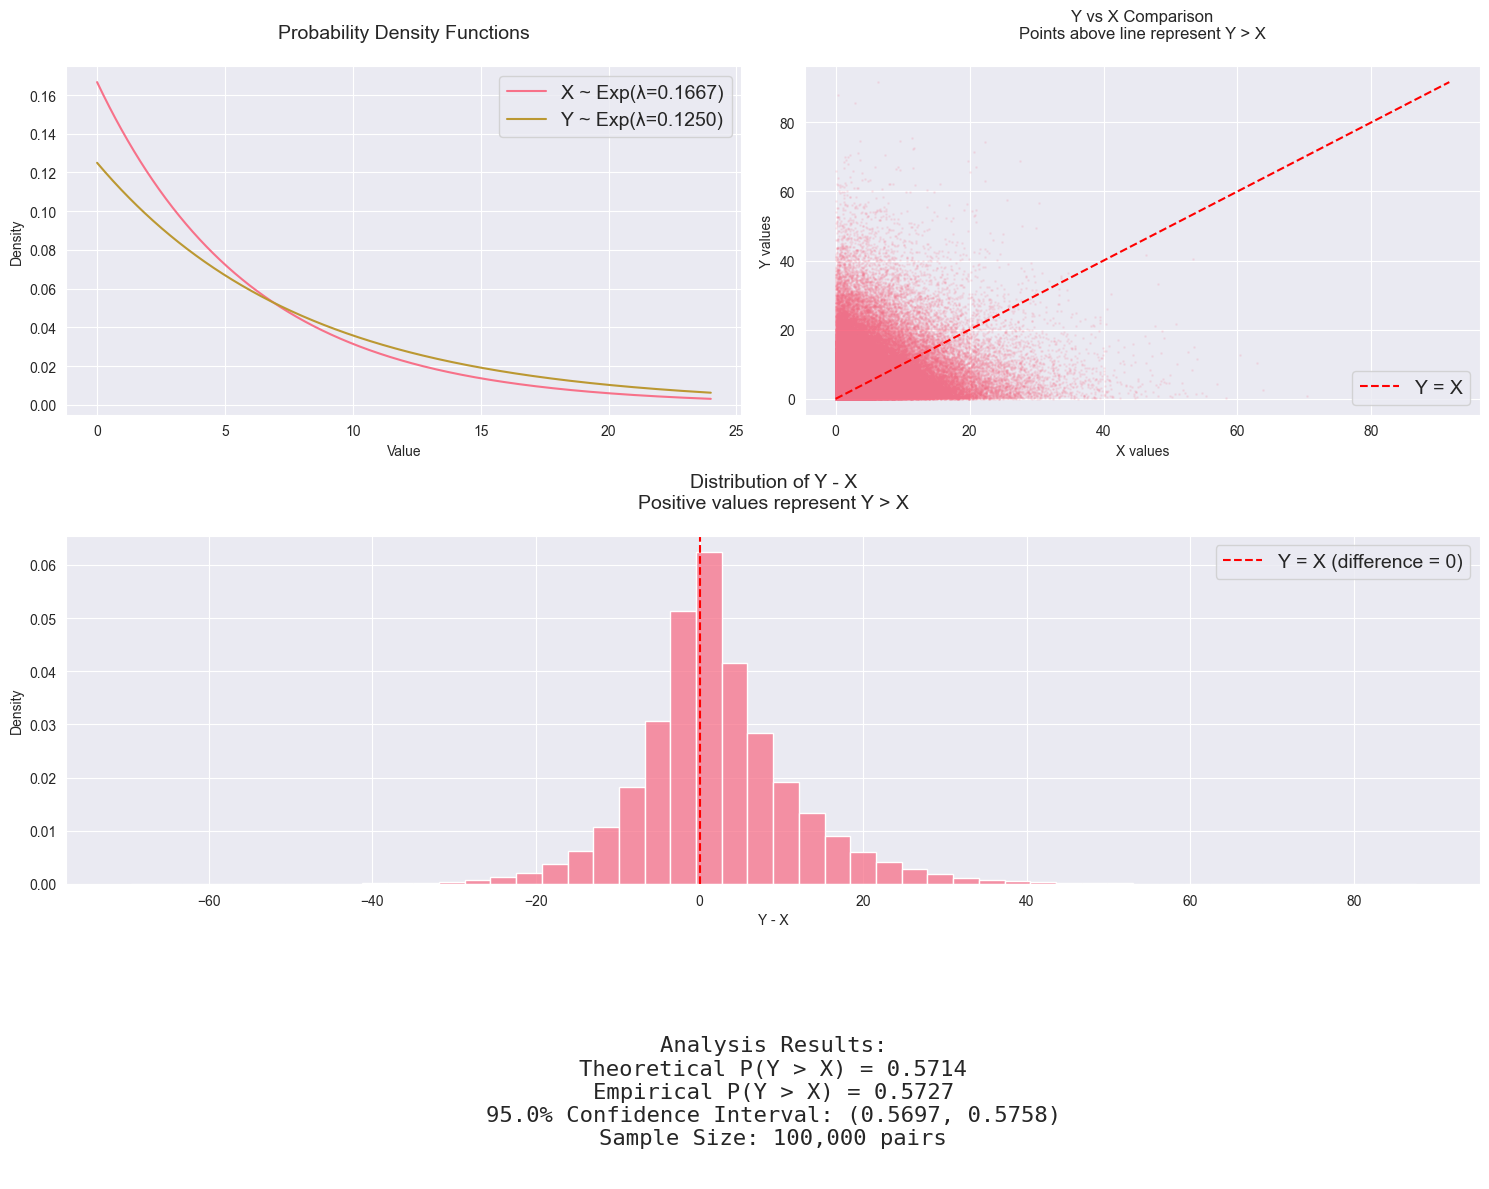


Detailed Analysis Results:
Parameters:
  Mean X: 6
  Mean Y: 8
  Sample Size: 100,000
  Confidence Level: 95.0%

Theoretical Results:
  λ₁ (X) = 1/6 = 0.1667
  λ₂ (Y) = 1/8 = 0.1250
  P(Y > X) = 0.5714

Empirical Results:
  P(Y > X) = 0.5727
  95.0% CI: (0.5697, 0.5758)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import Tuple
import matplotlib.gridspec as gridspec
from dataclasses import dataclass
import warnings

# Configure plotting style for professional appearance
sns.set_style('darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

@dataclass
class ExponentialParameters:
    """Container for exponential distribution parameters."""
    mean_x: float
    mean_y: float
    n_samples: int
    confidence_level: float = 0.95
    
    @property
    def lambda_x(self) -> float:
        """Rate parameter for distribution X."""
        return 1 / self.mean_x
    
    @property
    def lambda_y(self) -> float:
        """Rate parameter for distribution Y."""
        return 1 / self.mean_y
    
    @property
    def theoretical_probability(self) -> float:
        """Calculate theoretical P(Y > X)."""
        return self.lambda_x / (self.lambda_x + self.lambda_y)

class ExponentialAnalysis:
    """Class for analyzing independent exponential distributions."""
    
    def __init__(self, params: ExponentialParameters):
        """Initialize with distribution parameters."""
        self.params = params
        self.X = None
        self.Y = None
        self.empirical_prob = None
        self.confidence_interval = None
        
    def generate_samples(self) -> None:
        """Generate random samples from both distributions."""
        np.random.seed(42)  # For reproducibility
        self.X = np.random.exponential(scale=self.params.mean_x, 
                                     size=self.params.n_samples)
        self.Y = np.random.exponential(scale=self.params.mean_y, 
                                     size=self.params.n_samples)
        
    def calculate_empirical_probability(self) -> Tuple[float, Tuple[float, float]]:
        """Calculate empirical probability and confidence interval."""
        if self.X is None or self.Y is None:
            self.generate_samples()
            
        # Calculate empirical probability
        successes = np.sum(self.Y > self.X)
        self.empirical_prob = successes / self.params.n_samples
        
        # Calculate confidence interval using normal approximation
        z = stats.norm.ppf((1 + self.params.confidence_level) / 2)
        margin_error = z * np.sqrt((self.empirical_prob * (1 - self.empirical_prob)) 
                                 / self.params.n_samples)
        self.confidence_interval = (self.empirical_prob - margin_error,
                                  self.empirical_prob + margin_error)
        
        return self.empirical_prob, self.confidence_interval

    def create_visualization(self) -> plt.Figure:
        """Create comprehensive visualization of the analysis."""
        if self.empirical_prob is None:
            self.calculate_empirical_probability()
            
        # Create figure with custom grid
        fig = plt.figure(figsize=(15, 12))
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 0.5])
        
        # Density Plot
        ax1 = fig.add_subplot(gs[0, 0])
        x_range = np.linspace(0, max(self.params.mean_x * 3, self.params.mean_y * 3), 1000)
        ax1.plot(x_range, stats.expon.pdf(x_range, scale=self.params.mean_x),
                label=f'X ~ Exp(λ={self.params.lambda_x:.4f})')
        ax1.plot(x_range, stats.expon.pdf(x_range, scale=self.params.mean_y),
                label=f'Y ~ Exp(λ={self.params.lambda_y:.4f})')
        ax1.set_title('Probability Density Functions', fontsize=14, pad=20)
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Density')
        ax1.legend(fontsize=14)
        
        # Scatter Plot
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.scatter(self.X, self.Y, alpha=0.1, s=1)
        max_val = max(self.X.max(), self.Y.max())
        ax2.plot([0, max_val], [0, max_val], 'r--', label='Y = X')
        ax2.set_title('Y vs X Comparison\nPoints above line represent Y > X', 
                     fontsize=12, pad=20)
        ax2.set_xlabel('X values')
        ax2.set_ylabel('Y values')
        ax2.legend(fontsize=14)
        
        # Difference Distribution
        ax3 = fig.add_subplot(gs[1, :])
        differences = self.Y - self.X
        sns.histplot(differences, stat='density', bins=50, ax=ax3)
        ax3.axvline(x=0, color='r', linestyle='--', label='Y = X (difference = 0)')
        ax3.set_title('Distribution of Y - X\nPositive values represent Y > X', 
                     fontsize=14, pad=20)
        ax3.set_xlabel('Y - X')
        ax3.set_ylabel('Density')
        ax3.legend(fontsize=14)
        
        # Results text
        ax4 = fig.add_subplot(gs[2, :])
        ax4.axis('off')
        results_text = (
            f"Analysis Results:\n"
            f"Theoretical P(Y > X) = {self.params.theoretical_probability:.4f}\n"
            f"Empirical P(Y > X) = {self.empirical_prob:.4f}\n"
            f"{self.params.confidence_level*100}% Confidence Interval: "
            f"({self.confidence_interval[0]:.4f}, {self.confidence_interval[1]:.4f})\n"
            f"Sample Size: {self.params.n_samples:,} pairs"
        )
        ax4.text(0.5, 0.5, results_text, ha='center', va='center', 
                fontsize=16, fontfamily='monospace')
        
        plt.tight_layout()
        return fig

def main():
    """Main function to run the analysis."""
    # Initialize parameters
    params = ExponentialParameters(
        mean_x=6,
        mean_y=8,
        n_samples=100000,
        confidence_level=0.95
    )
    
    # Create analysis object
    analysis = ExponentialAnalysis(params)
    
    # Generate and show visualization
    fig = analysis.create_visualization()
    plt.show()
    
    # Print detailed results
    print("\nDetailed Analysis Results:")
    print("=" * 50)
    print(f"Parameters:")
    print(f"  Mean X: {params.mean_x}")
    print(f"  Mean Y: {params.mean_y}")
    print(f"  Sample Size: {params.n_samples:,}")
    print(f"  Confidence Level: {params.confidence_level*100}%")
    print("\nTheoretical Results:")
    print(f"  λ₁ (X) = 1/{params.mean_x} = {params.lambda_x:.4f}")
    print(f"  λ₂ (Y) = 1/{params.mean_y} = {params.lambda_y:.4f}")
    print(f"  P(Y > X) = {params.theoretical_probability:.4f}")
    print("\nEmpirical Results:")
    print(f"  P(Y > X) = {analysis.empirical_prob:.4f}")
    print(f"  {params.confidence_level*100}% CI: "
          f"({analysis.confidence_interval[0]:.4f}, "
          f"{analysis.confidence_interval[1]:.4f})")

if __name__ == "__main__":
    main()

In [12]:
print(sns.set_style)

<function set_style at 0x147e85da0>
